In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
WORKDIR="/workdir/dwm269/scMuscle2"
os.chdir(WORKDIR)

In [3]:
meta = pd.read_csv("scMuscle2_metadata_v1-0.csv")

meta = meta.loc[meta["include"],] # remove unwanted metadata
meta = meta[[x in ["Homo sapiens", "Mus musculus"] for x in meta["species"]]]                       # subset by species 

meta = meta[list(meta["file.format"]!="ERR")]                                                       # remove samples with file format issues
meta = meta[list(meta["file.format"]!="ngdc_fastq")]                                                # remove samples with file format issues

meta = meta[list(meta["GSM.accession"]!="NA")]
meta = meta[list(meta["GSM.accession"]!="")]
meta = meta[[x in ["3p_v2", "3p_v3", "3p_v3.1", "5p_v1"] for x in meta["chemistry"]]]               # subset out 10x Genomics' chemistries
meta = meta[[x in ["muscle", "tendon","limb", "ligament", "cartilage"] for x in meta["tissue"]]]    # subset tissues of interest

In [4]:
meta

,source.label,sample,description,tissue,subtissue,comments,include,ambient.decon,species,GSE.accession,...,sample.accession,SAMN.accession,file.checksum,other.accession,source,manuscript.doi,manuscript.pubmed,experiment.instrument,study.title,study.abstract
0,Tabula Muris 2018,10X_P4_0,NaN,muscle,tongue,NaN,True,True,Mus musculus,GSE109774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tabula Muris 2018,10X_P4_1,NaN,muscle,tongue,NaN,True,True,Mus musculus,GSE109774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tabula Muris 2018,10X_P7_10,NaN,muscle,tongue,NaN,True,True,Mus musculus,GSE109774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tabula Muris 2018,10X_P7_14,NaN,muscle,hindlimb,NaN,True,True,Mus musculus,GSE109774,...,SRS3044258,NaN,ftp://ftp.sra.ebi.ac.uk/vol1/SRA653/SRA653146/...,NaN,"Tabula Muris, Nature, 2018",NaN,https://pubmed.ncbi.nlm.nih.gov/30283141/,Illumina NovaSeq 6000,Tabula Muris: Transcriptomic characterization ...,We have created a resource of single cell tran...
5,Tabula Muris 2018,10X_P7_15,NaN,muscle,hindlimb,NaN,True,True,Mus musculus,GSE109774,...,SRS3044259,NaN,ftp://ftp.sra.ebi.ac.uk/vol1/SRA653/SRA653146/...,NaN,"Tabula Muris, Nature, 2018",NaN,https://pubmed.ncbi.nlm.nih.gov/30283141/,Illumina NovaSeq 6000,Tabula Muris: Transcriptomic characterization ...,We have created a resource of single cell tran...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Fuiten 2023,"Day 2, replicate B, scRNAseq",NaN,limb,in vitro,NaN,True,True,Mus musculus,GSE221883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,Fuiten 2023,"Day 7, replicate A, scRNAseq",NaN,limb,in vitro,"index read treated as R1, R1 treated as R2, R2...",True,True,Mus musculus,GSE221883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,Fuiten 2023,"Day 7, replicate B, scRNAseq",NaN,limb,in vitro,"index read treated as R1, R1 treated as R2, R2...",True,True,Mus musculus,GSE221883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,Fuiten 2023,"Day 10, replicate A, scRNAseq",NaN,limb,in vitro,"index read treated as R1, R1 treated as R2, R2...",True,True,Mus musculus,GSE221883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Stacked bar chart showing species & chemistry

In [7]:
stacked_data

,species,chemistry,include,ambient.decon
0,Homo sapiens,3p_v2,43,39
1,Homo sapiens,3p_v3,99,75
2,Homo sapiens,3p_v3.1,5,5
3,Homo sapiens,5p_v1,18,18
4,Mus musculus,3p_v2,183,136
5,Mus musculus,3p_v3,170,128
6,Mus musculus,3p_v3.1,31,29


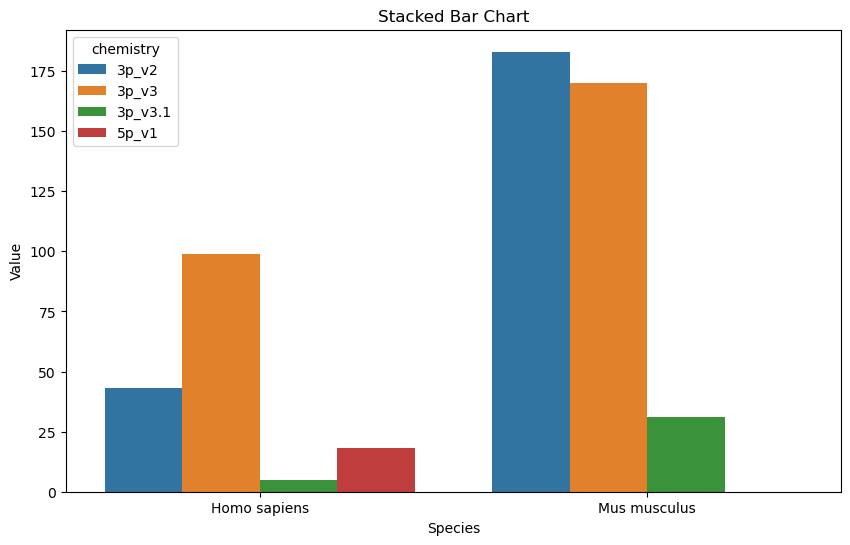

In [9]:
# Prepare the data for the stacked bar chart
stacked_data = meta.groupby(['species', 'chemistry']).size().reset_index(name='count')

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='species', 
    y='count',
    hue='chemistry',
    data=stacked_data
)

plt.title('Stacked Bar Chart')
plt.xlabel('Species')
plt.ylabel('Value')

plt.show()